In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load the dataset
data_path = 'groundwater_depth.csv'  # Update this path to your dataset file
data = pd.read_csv(data_path)

In [3]:
# Display the first few rows of the dataset
print(data.head())

   S.no.   Name of State Name of District  \
0      1  ANDHRA PRADESH        Anantapur   
1      2  ANDHRA PRADESH         Chittoor   
2      3  ANDHRA PRADESH    East Godavari   
3      4  ANDHRA PRADESH           Guntur   
4      5  ANDHRA PRADESH           Kadapa   

   Recharge from rainfall During Monsoon Season  \
0                                      89200.23   
1                                     115718.55   
2                                     104140.05   
3                                      52942.86   
4                                      93311.68   

   Recharge from other sources During Monsoon Season  \
0                                           46136.12   
1                                           32389.60   
2                                           95383.56   
3                                           57011.90   
4                                           15869.52   

   Recharge from rainfall During Non Monsoon Season  \
0                             

In [4]:
print(data.columns)

Index(['S.no.', 'Name of State', 'Name of District',
       'Recharge from rainfall During Monsoon Season',
       'Recharge from other sources During Monsoon Season',
       'Recharge from rainfall During Non Monsoon Season',
       'Recharge from other sources During Non Monsoon Season',
       'Total Annual Ground Water Recharge', 'Total Natural Discharges',
       'Annual Extractable Ground Water Resource',
       'Current Annual Ground Water Extraction For Irrigation',
       'Current Annual Ground Water Extraction For Domestic & Industrial Use',
       'Total Current Annual Ground Water Extraction',
       'Annual GW Allocation for Domestic Use as on 2025',
       'Net Ground Water Availability for future use',
       'Stage of Ground Water Extraction (%)'],
      dtype='object')


In [5]:
data = data.dropna()

In [6]:
target_column = 'Stage of Ground Water Extraction (%)'  # Update this if your target column name is different
X = data.drop(target_column, axis=1)
y = data[target_column]

In [7]:
categorical_columns = ['Name of State', 'Name of District']  # Update this if your categorical column names are different
numeric_columns = X.columns.difference(categorical_columns)

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [11]:
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')

Random Forest Mean Squared Error: 89.39746341021907


In [12]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [13]:
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
dnn_model.compile(optimizer='adam', loss='mse')
history = dnn_model.fit(X_train_preprocessed, y_train, epochs=100, validation_split=0.2, verbose=1)

C:\Users\rikis\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 7263.4419 - val_loss: 4747.7515
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7348.8413 - val_loss: 4645.1191
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6652.9897 - val_loss: 4484.6572
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7812.0835 - val_loss: 4242.8379
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6267.5732 - val_loss: 3901.5933
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5240.6899 - val_loss: 3475.4390
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5380.7896 - val_loss: 2960.2478
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4707.9121 - val_loss: 2408.1152
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3668.1060 - val_loss: 1892.7413
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3573.4651 - val_loss: 1457.9396
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2289.1221 - val_lo

In [14]:
y_pred_dnn = dnn_model.predict(X_test_preprocessed)
mse_dnn = mean_squared_error(y_test, y_pred_dnn)
print(f'DNN Mean Squared Error: {mse_dnn}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
DNN Mean Squared Error: 417.6023305065769


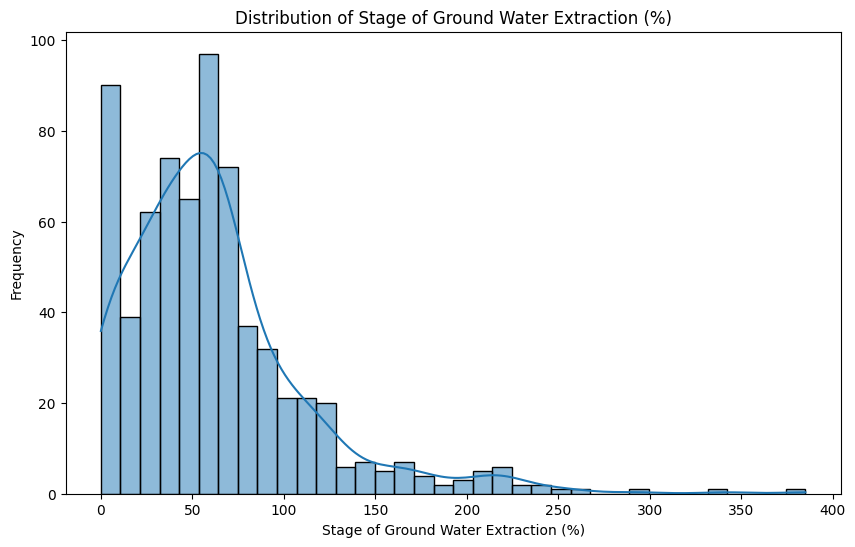

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of Stage of Ground Water Extraction (%)')
plt.xlabel('Stage of Ground Water Extraction (%)')
plt.ylabel('Frequency')
plt.show()

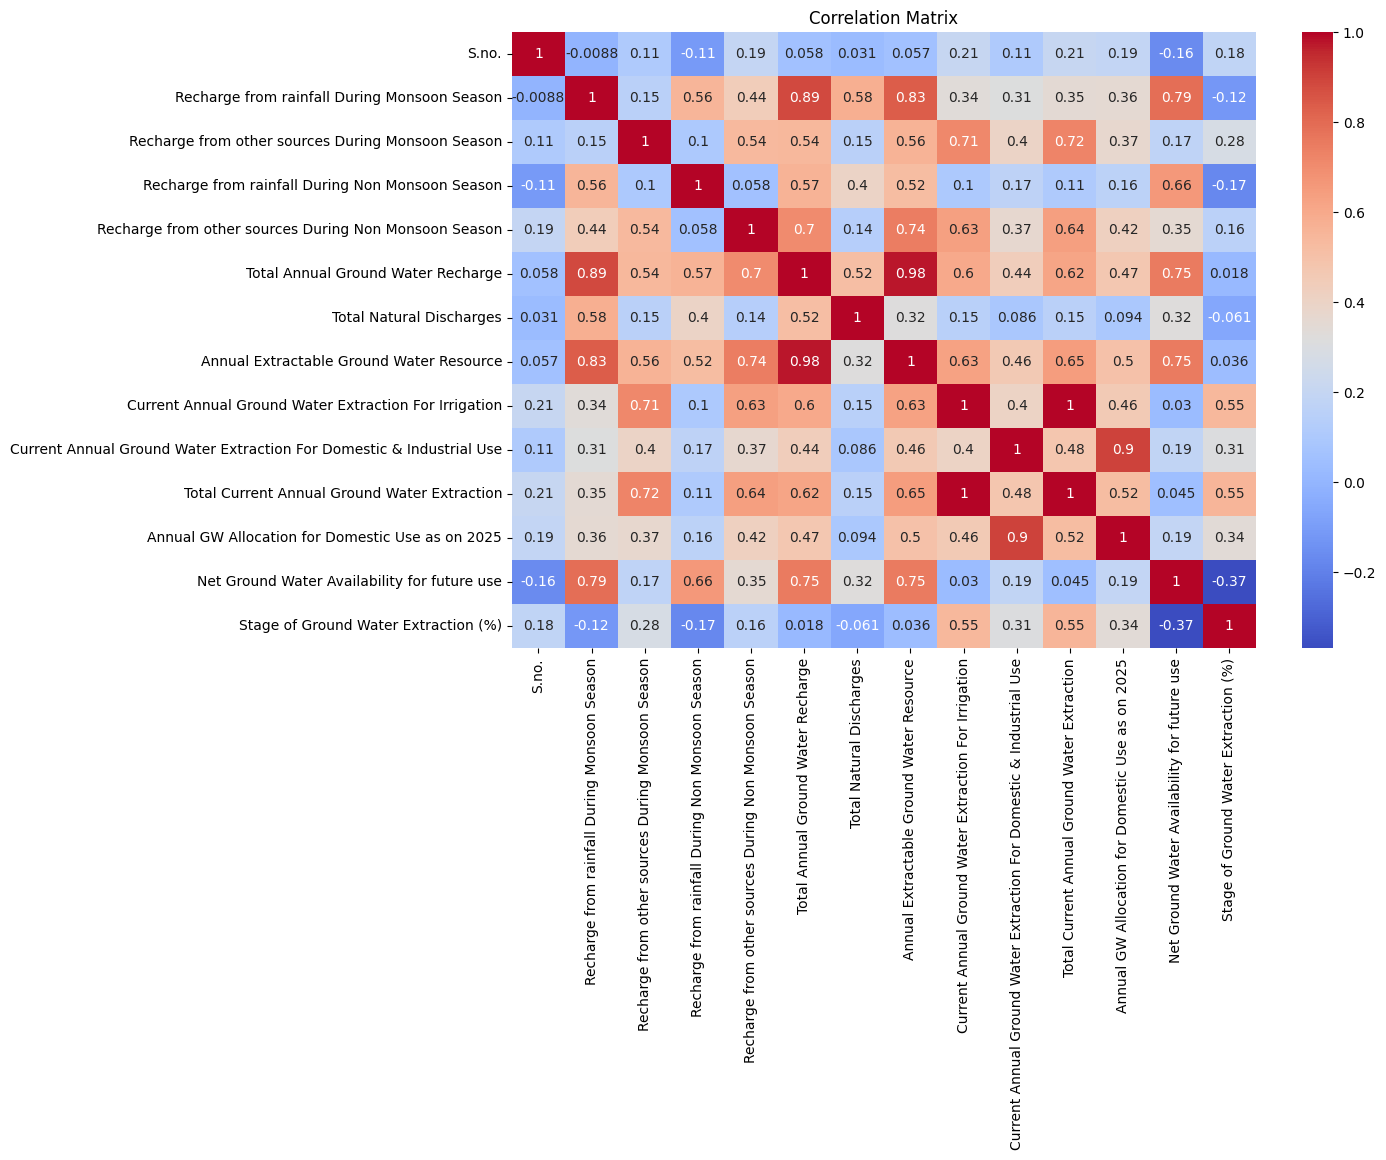

In [16]:
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

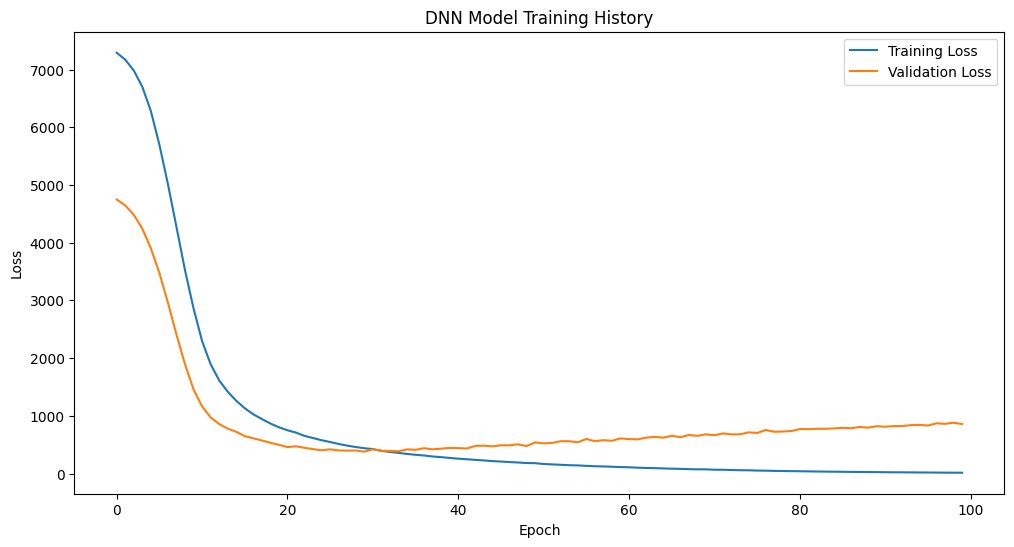

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('DNN Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

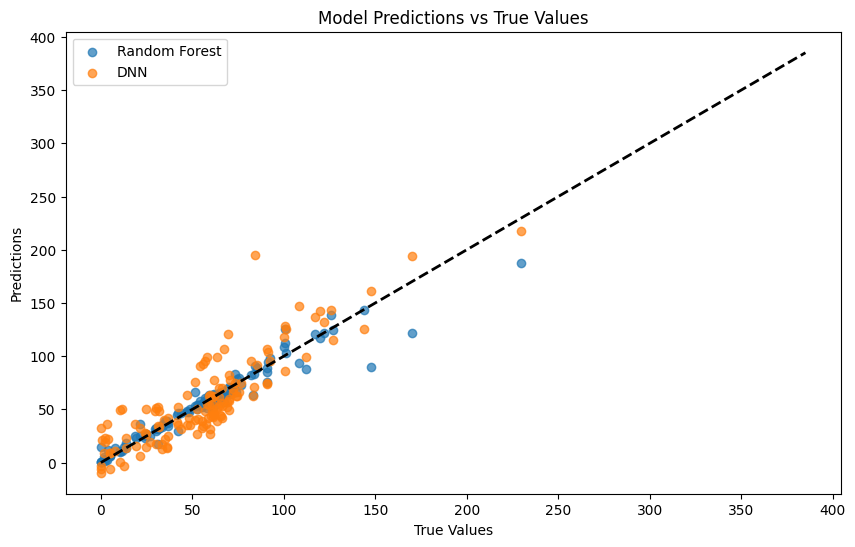

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.7)
plt.scatter(y_test, y_pred_dnn, label='DNN', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title('Model Predictions vs True Values')
plt.show()

In [20]:
print(f'Random Forest MSE: {mse_rf}')
print(f'DNN MSE: {mse_dnn}')

if mse_rf < mse_dnn:
    print("Random Forest performed better.")
else:
    print("DNN performed better.")

Random Forest MSE: 89.39746341021907
DNN MSE: 417.6023305065769
Random Forest performed better.
